In [63]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [64]:
IMAGE_SIZE= 256
BATCH_SIZE=32


In [65]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [66]:
class_names=dataset.class_names

In [67]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [68]:
len(dataset)
#32*68~ 2152

68

In [69]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy()) #every element we get is the tensor so we need to covert into the numpy (3 classes)
#(32, 256, 256, 3)
#               rgb(channels)

(32, 256, 256, 3)
[0 2 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 2 1 0 1 1 2 1 1 0 0 1 0 1 0]


In [70]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])

tf.Tensor(
[[[176. 157. 159.]
  [178. 159. 161.]
  [166. 147. 149.]
  ...
  [172. 159. 166.]
  [178. 165. 172.]
  [179. 166. 173.]]

 [[163. 144. 146.]
  [201. 182. 184.]
  [196. 177. 179.]
  ...
  [186. 173. 180.]
  [192. 179. 186.]
  [172. 159. 166.]]

 [[174. 155. 157.]
  [177. 158. 160.]
  [157. 138. 140.]
  ...
  [171. 158. 165.]
  [194. 181. 188.]
  [177. 164. 171.]]

 ...

 [[201. 186. 193.]
  [172. 157. 164.]
  [146. 131. 138.]
  ...
  [170. 157. 167.]
  [168. 155. 165.]
  [165. 152. 162.]]

 [[166. 151. 158.]
  [193. 178. 185.]
  [166. 151. 158.]
  ...
  [173. 160. 170.]
  [173. 160. 170.]
  [173. 160. 170.]]

 [[190. 175. 182.]
  [153. 138. 145.]
  [208. 193. 200.]
  ...
  [165. 152. 162.]
  [163. 150. 160.]
  [162. 149. 159.]]], shape=(256, 256, 3), dtype=float32)


In [71]:
#every number is represented between 0-255 (color is represented bit by 0-255)
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy)

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[171., 166., 172.],
        [174., 169., 175.],
        [179., 174., 180.],
        ...,
        [200., 195., 201.],
        [140., 135., 141.],
        [178., 173., 179.]],

       [[173., 168., 174.],
        [175., 170., 176.],
        [179., 174., 180.],
        ...,
        [155., 150., 156.],
        [184., 179., 185.],
        [152., 147., 153.]],

       [[175., 170., 176.],
        [177., 172., 178.],
        [179., 174., 180.],
        ...,
        [144., 139., 145.],
        [197., 192., 198.],
        [145., 140., 146.]],

       ...,

       [[156., 150., 154.],
        [157., 151., 155.],
        [158., 152., 156.],
        ...,
        [ 61.,  58.,  67.],
        [ 57.,  54.,  63.],
        [ 62.,  59.,  68.]],

       [[161., 155., 159.],
        [159., 153., 157.],
        [158., 152., 156.],
        ...,
        [ 76.,  73.,  82.],
        [ 60.,  57.,  66.],
       

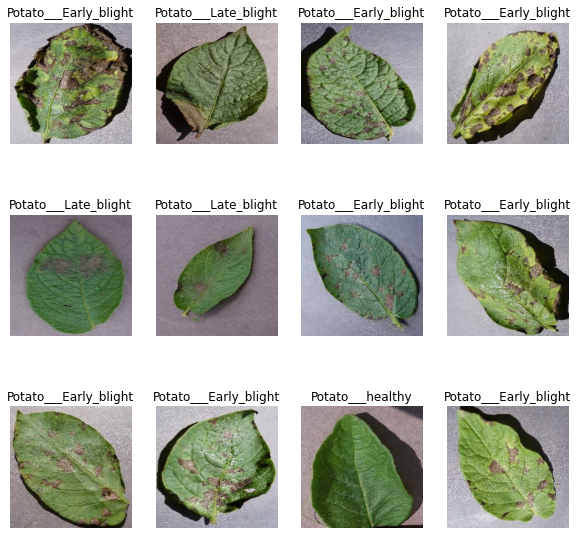

In [72]:
#visualize the images
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) #convert into the integers as it is the float
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [73]:
len(dataset)
#each element is 32 batch so 32*68~2157

68

In [74]:
# 80%=>training set
# 20%=> 
# 10% validation set(used while traning process(after each echo we will do validation on this)), 
# 10% test set(final model builed we need to test accuray before deploying)

In [75]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [76]:
train_dataset=dataset.take(54) #datset[:54]
len(train_dataset)

54

In [77]:
remaing_dataset=dataset.skip(54) #dataset[54:]
len(remaing_dataset)

14

In [78]:
# 10 percentage of validation set
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [79]:
# we need to take the 6 images as the validation dataset
validation_datset=remaing_dataset.take(6)
len(validation_datset)

6

In [80]:
test_dataset=remaing_dataset.skip(6)
len(test_dataset)

8

In [81]:
#take the tensorflow dataset and split the train,test,val using below function
def dataset_partitioning_tf(dataset,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True, shuffle_size=10000):
    ds_size=len(dataset)
    
    if shuffle:
        dataset=dataset.shuffle(shuffle_size,seed=12)#seed is for just predictability same seed every time it will give you same result
    
    train_size=int(ds_size*train_split)
    val_size=int(ds_size*val_split)
    test_size=int(ds_size*test_split)
    
    train_ds=dataset.take(train_size)
    rem_ds=dataset.skip(train_size)
    val_ds=rem_ds.take(val_size)
    test_ds=rem_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

In [82]:
train_ds, val_ds, test_ds=dataset_partitioning_tf(dataset)

In [83]:
print(len(train_ds))
print(len(val_ds))
print(len(test_ds))

54
6
8


In [84]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#this improve the preformance of pipeline as it stores the images in cache
#if we are using GPU or CPU if GPU is busy taining prefetch will load the next set of batch from your disk that will improve the performance

# preprocessing

In [85]:
#scaling the numpy array between 0-1 by dviding it by 255 (rgb)
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [86]:
"""make model robust
if we train a model using some images and then try predicting and if we supply image that is rotated or diff in contrast 
then our model will not erform better.
so we use the concept called as tensorflow data argumentaion 
original image=>horizontal_flip,contrast,rotation,zoom 4 new training smaples(new training samples)
"""

'make model robust\nif we train a model using some images and then try predicting and if we supply image that is rotated or diff in contrast \nthen our model will not erform better.\nso we use the concept called as tensorflow data argumentaion \noriginal image=>horizontal_flip,contrast,rotation,zoom 4 new training smaples(new training samples)\n'

In [87]:
#data augmentaion
# data_augmentaion=tf.keras.Sequential([
#     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
#     layers.experimental.preprocessing.RandomRotation(0.2)
# ])

# Building the model using CNN

In [88]:
CHANNELS = 3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
    resize_and_rescale,
    data_augmentaion,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [90]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [91]:
EPOCHS=20

In [37]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
    
)

Epoch 1/20
54/54 [==============================] - 149s 2s/step - loss: 0.9094 - accuracy: 0.5093 - val_loss: 0.8574 - val_accuracy: 0.6146
Epoch 2/20
54/54 [==============================] - 101s 2s/step - loss: 0.7493 - accuracy: 0.6372 - val_loss: 0.6151 - val_accuracy: 0.7135
Epoch 3/20
54/54 [==============================] - 101s 2s/step - loss: 0.4733 - accuracy: 0.8154 - val_loss: 0.2836 - val_accuracy: 0.8802
Epoch 4/20
54/54 [==============================] - 101s 2s/step - loss: 0.3316 - accuracy: 0.8669 - val_loss: 0.3296 - val_accuracy: 0.9010
Epoch 5/20
54/54 [==============================] - 102s 2s/step - loss: 0.2933 - accuracy: 0.8837 - val_loss: 0.1982 - val_accuracy: 0.9167
Epoch 6/20
54/54 [==============================] - 129s 2s/step - loss: 0.2233 - accuracy: 0.9109 - val_loss: 0.1532 - val_accuracy: 0.9427
Epoch 7/20
54/54 [==============================] - 100s 2s/step - loss: 0.2589 - accuracy: 0.8976 - val_loss: 0.1228 - val_accuracy: 0.9427
Epoch 8/20
54

In [38]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 410ms/step - loss: 0.0378 - accuracy: 0.9844


In [39]:
scores

[0.03776075690984726, 0.984375]

In [51]:
history

In [52]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 54}

In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [54]:
history.history['accuracy']

[0.5092592835426331,
 0.6371527910232544,
 0.8153935074806213,
 0.8668981194496155,
 0.8836805820465088,
 0.9108796119689941,
 0.8975694179534912,
 0.9380787014961243,
 0.9184027910232544,
 0.9351851940155029,
 0.9473379850387573,
 0.9392361044883728,
 0.9415509104728699,
 0.9606481194496155,
 0.953125,
 0.9571759104728699,
 0.9675925970077515,
 0.9670138955116272,
 0.9565972089767456,
 0.9693287014961243]

In [55]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

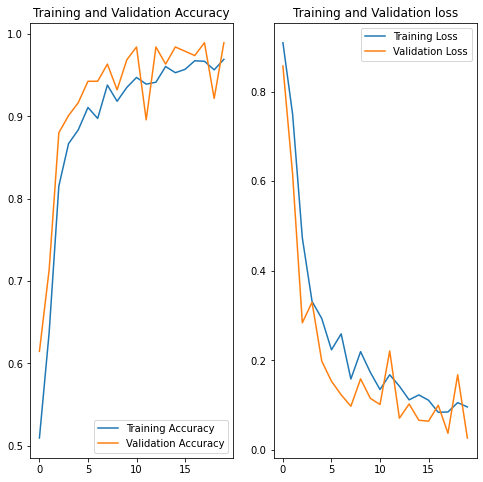

In [58]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend()
plt.title("Training and Validation loss")

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


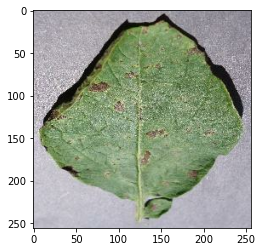

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [42]:
import matplotlib.pyplot as plt

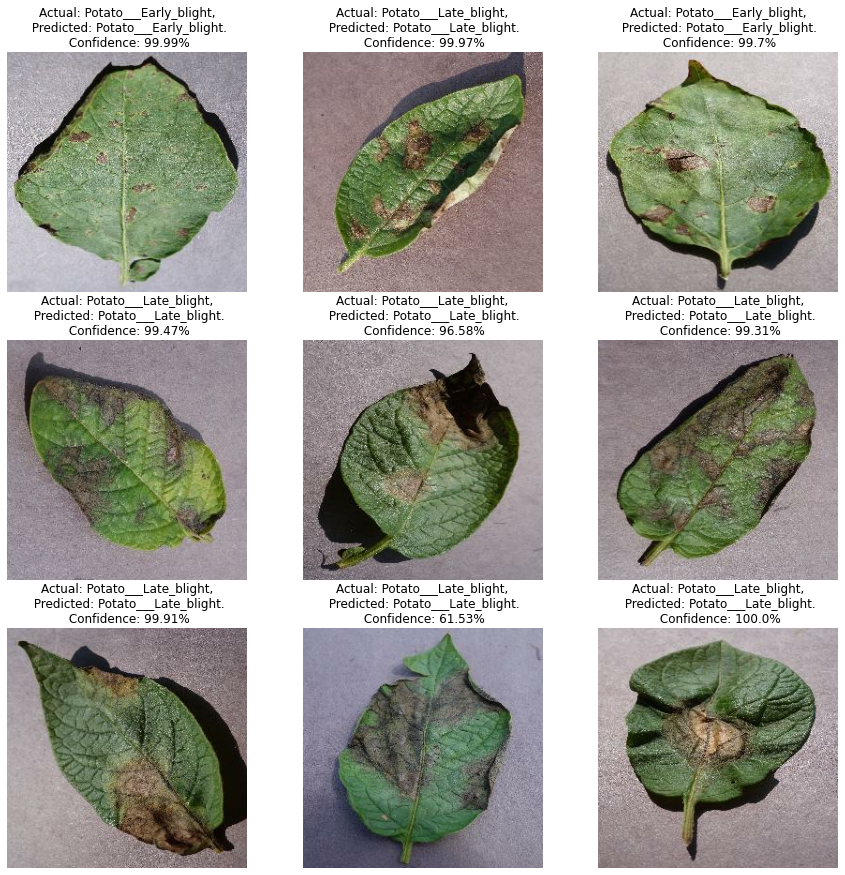

In [50]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [62]:
model_dir = "../models"
model_version = 1
model_export_path = f"{model_dir}/{model_version}"

tf.saved_model.save(
    model,
    export_dir=model_export_path,
)

print(f"SavedModel files: {os.listdir(model_export_path)}")

KeyError: "Failed to add concrete function 'b'__inference_sequential_2_layer_call_fn_26733'' to object-based SavedModel as it captures tensor <tf.Tensor: shape=(), dtype=resource, value=<Resource Tensor>> which is unsupported or not reachable from root. One reason could be that a stateful object or a variable that the function depends on is not assigned to an attribute of the serialized trackable object (see SaveTest.test_captures_unreachable_variable)."

In [61]:
model_vesion=1
model.save(f"./models/{model_vesion}")

KeyError: "Failed to add concrete function 'b'__inference_sequential_2_layer_call_fn_23825'' to object-based SavedModel as it captures tensor <tf.Tensor: shape=(), dtype=resource, value=<Resource Tensor>> which is unsupported or not reachable from root. One reason could be that a stateful object or a variable that the function depends on is not assigned to an attribute of the serialized trackable object (see SaveTest.test_captures_unreachable_variable)."

In [47]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

KeyError: "Failed to add concrete function 'b'__inference_sequential_2_layer_call_fn_13509'' to object-based SavedModel as it captures tensor <tf.Tensor: shape=(), dtype=resource, value=<Resource Tensor>> which is unsupported or not reachable from root. One reason could be that a stateful object or a variable that the function depends on is not assigned to an attribute of the serialized trackable object (see SaveTest.test_captures_unreachable_variable)."

In [48]:
model.save("../potatoes.h5")